In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [24]:
jury = {"Ethnicity":["Asian","Black","Latino","White","Other"],"Eligible":[0.15,0.18,0.12,0.54,0.01],"Panels":[0.26,0.08,0.08,0.54,0.04]}
jury

{'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
 'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
 'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}

In [25]:
Alameda_df = pd.DataFrame(jury)
Alameda_df

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


In [26]:
Alameda_df_1 = Alameda_df.set_index('Ethnicity')
Alameda_df_1

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


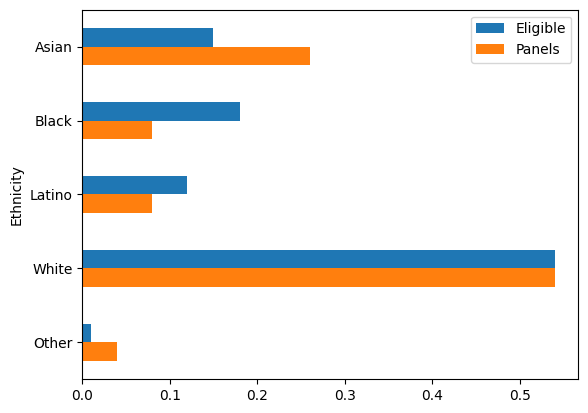

In [27]:
#Bar chart for visualising the difference
Alameda_df_1.plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

#### Difference between Two Distributions

In [28]:
#add a column for difference in eligible and panel 
Alameda_df_1['jury_with_diffs'] = Alameda_df_1['Panels']-Alameda_df_1['Eligible']
Alameda_df_1

,Eligible,Panels,jury_with_diffs
Ethnicity,,,
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.10
Latino,0.12,0.08,-0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


In [29]:
#finding ab
Alameda_df_1['Abs.Difference']=abs(Alameda_df_1['jury_with_diffs'])
Alameda_df_1

,Eligible,Panels,jury_with_diffs,Abs.Difference
Ethnicity,,,,
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.10,0.10
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0.00,0.00
Other,0.01,0.04,0.03,0.03


In [30]:
test_statistic = Alameda_df_1['Abs.Difference'].sum()/2
test_statistic

0.14

In [31]:
import numpy as np

In [32]:
#function for calculating total variation distance
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2

In [33]:
def table_tvd(table, label, other):
    return total_variation_distance(table[label], table[other])

observed_stat =table_tvd(Alameda_df, 'Eligible', 'Panels')
print(observed_stat)

0.14


In [34]:
panel_size = 1453

In [37]:
import numpy.random as npr
npr.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])

array([206, 252, 165, 812,  18])

In [38]:
Alameda_df_2 = pd.DataFrame(Alameda_df_1,columns = ['Eligible','Panels'])

In [43]:
Alameda_df_2['Random Sample'] = npr.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])/1453
Alameda_df_2

,Eligible,Panels,Random Sample
Ethnicity,,,
Asian,0.15,0.26,0.152787
Black,0.18,0.08,0.171370
Latino,0.12,0.08,0.122505
White,0.54,0.54,0.540950
Other,0.01,0.04,0.012388


the distribution of the random sample is close to the distribution of the eligible population and is different from the distribution of the panels.

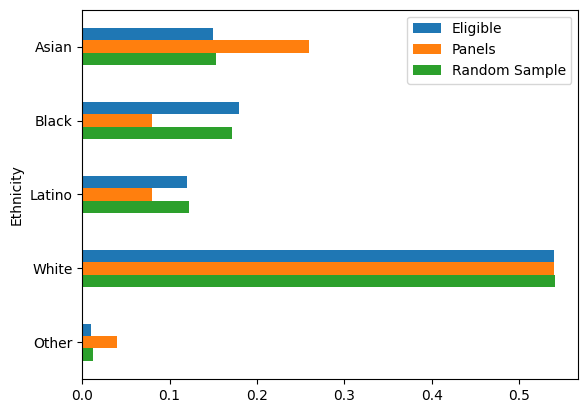

In [44]:
Alameda_df_2.plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

The green bar are  closer in size to the blue bars than the orange bars are. The randomsample resembles the eligible population, but the panels don't.

In [45]:
#Difference between eligible and Random sample
TVD = (abs(Alameda_df_2['Eligible']-Alameda_df_2['Random Sample'])).sum()/2
TVD

0.00863041982105983

In [48]:
simulations = 5000
tvd_list=[]
for i in np.arange(simulations):
    Alameda_df_2["Random Sample"]=(npr.multinomial(1453,[0.15, 0.18, 0.12, 0.54, 0.01]))/panel_size
    tvd_list.append(table_tvd(Alameda_df_2, 'Eligible', 'Random Sample'))
    

In [47]:
tvd_final_df=pd.DataFrame(tvd_list)
tvd_final_df.rename(columns={0:"TVD"},inplace=True) # renaming column
tvd_final_df.head()

,TVD
0,0.013551
1,0.006407
2,0.013655
3,0.011803
4,0.014749


Each row of the column above contains the total variation distance between a random sample of size 1453 (the size of the panels) and the population of eligible jurors.

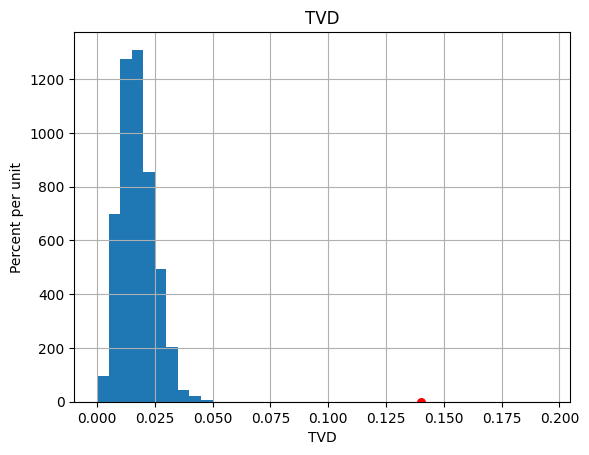

In [49]:
tvd_final_df.hist(bins=np.arange(0,0.2,0.005))
plt.ylabel('Percent per unit')
plt.xlabel('TVD')
plt.scatter(observed_stat, 0, color='red', s=30)

 distance between the panels and the population was 0.14,so it is farawaay from the distribution. panels were not representative of the distribution provided for the eligible jurors.
 
 hence  Null hypothesis is rejected